In [65]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
os.getcwd()

'C:\\Users\\bkolh\\OneDrive\\Desktop\\Priyanka\\2. Stats & ML\\July -23\\Lecture notes\\20-July-23 - Decision Tree\\21st July 2023'

In [3]:
credit_dt = pd.read_csv('German Credit Dataset.csv')

In [4]:
credit_dt.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


* DM - Deutsche Mark(currency of West Germany)
* By analyzing this dataset we should be able to know if the person is a credit defaulter or not. The "default" is a dependent variable and others are independet variables

In [5]:
credit_dt.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
credit_dt.shape

(1000, 17)

In [7]:
j =0
for i in credit_dt.columns:
    print('****',i,'****')    
    print(credit_dt[i].value_counts(),'\n')
    j = j+1

**** checking_balance ****
unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

**** months_loan_duration ****
24    184
12    179
18    113
36     83
6      75
15     64
9      49
48     48
30     40
21     30
10     28
60     13
27     13
42     11
11      9
20      8
8       7
4       6
45      5
7       5
39      5
14      4
13      4
33      3
28      3
54      2
16      2
22      2
47      1
5       1
26      1
72      1
40      1
Name: months_loan_duration, dtype: int64 

**** credit_history ****
good         530
critical     293
poor          88
very good     49
perfect       40
Name: credit_history, dtype: int64 

**** purpose ****
furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64 

**** amount ****
1478    3
1262    3
1258    3
1275    3
1393    3
       ..
1459    1
882     

Categorical variables:
1. checking balance
2. credit history
3. purpose
4. saving balance
5. employee duration
6. other credit
7. housing
8. job
9. dependents
10. phone


In [8]:
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

### Data Cleaning

In [9]:
credit_df = credit_dt.copy()

In [10]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 DM,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 DM,48,good,furniture/appliances,5951,< 100 DM,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 DM,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 DM,42,good,furniture/appliances,7882,< 100 DM,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 DM,24,poor,car,4870,< 100 DM,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes


In [11]:
# checking_balance, savings_balance, employment_duration

In [12]:
credit_df['checking_balance']. value_counts().index

Index(['unknown', '< 0 DM', '1 - 200 DM', '> 200 DM'], dtype='object')

In [13]:
data_correction = ['checking_balance','savings_balance','employment_duration']
def count_size():
    dict = {}
    for i in data_correction:
        x = credit_df[i].value_counts().index.size
        dict.update({i:x})
    return(dict)

# x = count_size()
# print(x, type(x))
             

In [14]:
for i in data_correction:
    x = count_size()
    if x[i]==4:
        credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,3)) )
    elif x[i]==5:
        credit_df[i]=np.where(credit_df[i]== credit_df[i].value_counts().index[0], 0, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[1], 1, 
                          np.where(credit_df[i]== credit_df[i].value_counts().index[2],2,
                        np.where(credit_df[i]== credit_df[i].value_counts().index[3],3,4))) )
          

In [15]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,critical,furniture/appliances,1169,1,1,4,4,67,none,own,2,skilled,1,yes,no
1,2,48,good,furniture/appliances,5951,0,0,2,2,22,none,own,1,skilled,1,no,yes
2,0,12,critical,education,2096,0,2,2,3,49,none,own,1,unskilled,2,no,no
3,1,42,good,furniture/appliances,7882,0,2,2,4,45,none,other,1,skilled,2,no,no
4,1,24,poor,car,4870,0,0,3,4,53,none,other,2,skilled,2,no,yes


In [16]:
for i in data_correction:
    print('---------', i, '\n',credit_df[i].value_counts(),'\n')
    print("*******Original********\n")
    print('---------', i, '\n', credit_dt[i].value_counts(),'\n')
    

--------- checking_balance 
 0    394
1    274
2    269
3     63
Name: checking_balance, dtype: int64 

*******Original********

--------- checking_balance 
 unknown       394
< 0 DM        274
1 - 200 DM    269
> 200 DM       63
Name: checking_balance, dtype: int64 

--------- savings_balance 
 0    603
1    183
2    103
3     63
4     48
Name: savings_balance, dtype: int64 

*******Original********

--------- savings_balance 
 < 100 DM         603
unknown          183
100 - 500 DM     103
500 - 1000 DM     63
> 1000 DM         48
Name: savings_balance, dtype: int64 

--------- employment_duration 
 0    339
1    253
2    174
3    172
4     62
Name: employment_duration, dtype: int64 

*******Original********

--------- employment_duration 
 1 - 4 years    339
> 7 years      253
4 - 7 years    174
< 1 year       172
unemployed      62
Name: employment_duration, dtype: int64 



> ***Looking at above data we can conclude that the data replacement is correctly done.***


In [17]:
# purpose

In [18]:
credit_df['purpose'].value_counts()

furniture/appliances    473
car                     337
business                 97
education                59
renovations              22
car0                     12
Name: purpose, dtype: int64

In [19]:
# Here we are replacing the "furniture/appliances" to "appliances"

In [20]:
credit_df['purpose'] = np.where(credit_df['purpose']=='furniture/appliances','appliances',credit_df['purpose'])

In [21]:
credit_df['purpose'].value_counts()

appliances     473
car            337
business        97
education       59
renovations     22
car0            12
Name: purpose, dtype: int64

In [22]:
# Changes are reflecting.

In [23]:
print(list(credit_dt.select_dtypes(include = 'object')))
print(len(list(credit_dt.select_dtypes(include = 'object'))))

['checking_balance', 'credit_history', 'purpose', 'savings_balance', 'employment_duration', 'other_credit', 'housing', 'job', 'phone', 'default']
10


In [24]:
print(list(credit_df.select_dtypes(include = 'object')))
print(len(list(credit_df.select_dtypes(include = 'object'))))

['credit_history', 'purpose', 'other_credit', 'housing', 'job', 'phone', 'default']
7


In [25]:
# before changes
credit_dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [26]:
#after changes
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   int32 
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   int32 
 6   employment_duration   1000 non-null   int32 
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

> After the above changes in data actual numeric variables got converted into numeric from object such as variables 'checking_balance', 'savings_balance' and 'employment_duration' 

In [27]:
credit_df.head()

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,1,6,critical,appliances,1169,1,1,4,4,67,none,own,2,skilled,1,yes,no
1,2,48,good,appliances,5951,0,0,2,2,22,none,own,1,skilled,1,no,yes
2,0,12,critical,education,2096,0,2,2,3,49,none,own,1,unskilled,2,no,no
3,1,42,good,appliances,7882,0,2,2,4,45,none,other,1,skilled,2,no,no
4,1,24,poor,car,4870,0,0,3,4,53,none,other,2,skilled,2,no,yes


### Checking Missing values

In [28]:
credit_df.isna().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

> ***No missing values are present.***

### Checking outlier

In [40]:
int_variable = list(credit_df.select_dtypes(include = 'int').columns)
print(int_variable)

['checking_balance', 'months_loan_duration', 'amount', 'savings_balance', 'employment_duration', 'percent_of_income', 'years_at_residence', 'age', 'existing_loans_count', 'dependents']


<AxesSubplot:xlabel='checking_balance'>

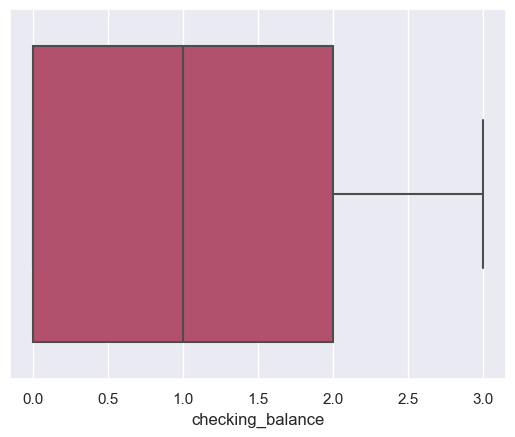

In [63]:
sns.boxplot(credit_df['checking_balance'], palette = 'flare')

In [30]:
credit_df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'checking_balance'),
  Text(1, 0, 'months_loan_duration'),
  Text(2, 0, 'amount'),
  Text(3, 0, 'savings_balance'),
  Text(4, 0, 'employment_duration'),
  Text(5, 0, 'percent_of_income'),
  Text(6, 0, 'years_at_residence'),
  Text(7, 0, 'age'),
  Text(8, 0, 'existing_loans_count'),
  Text(9, 0, 'dependents')])

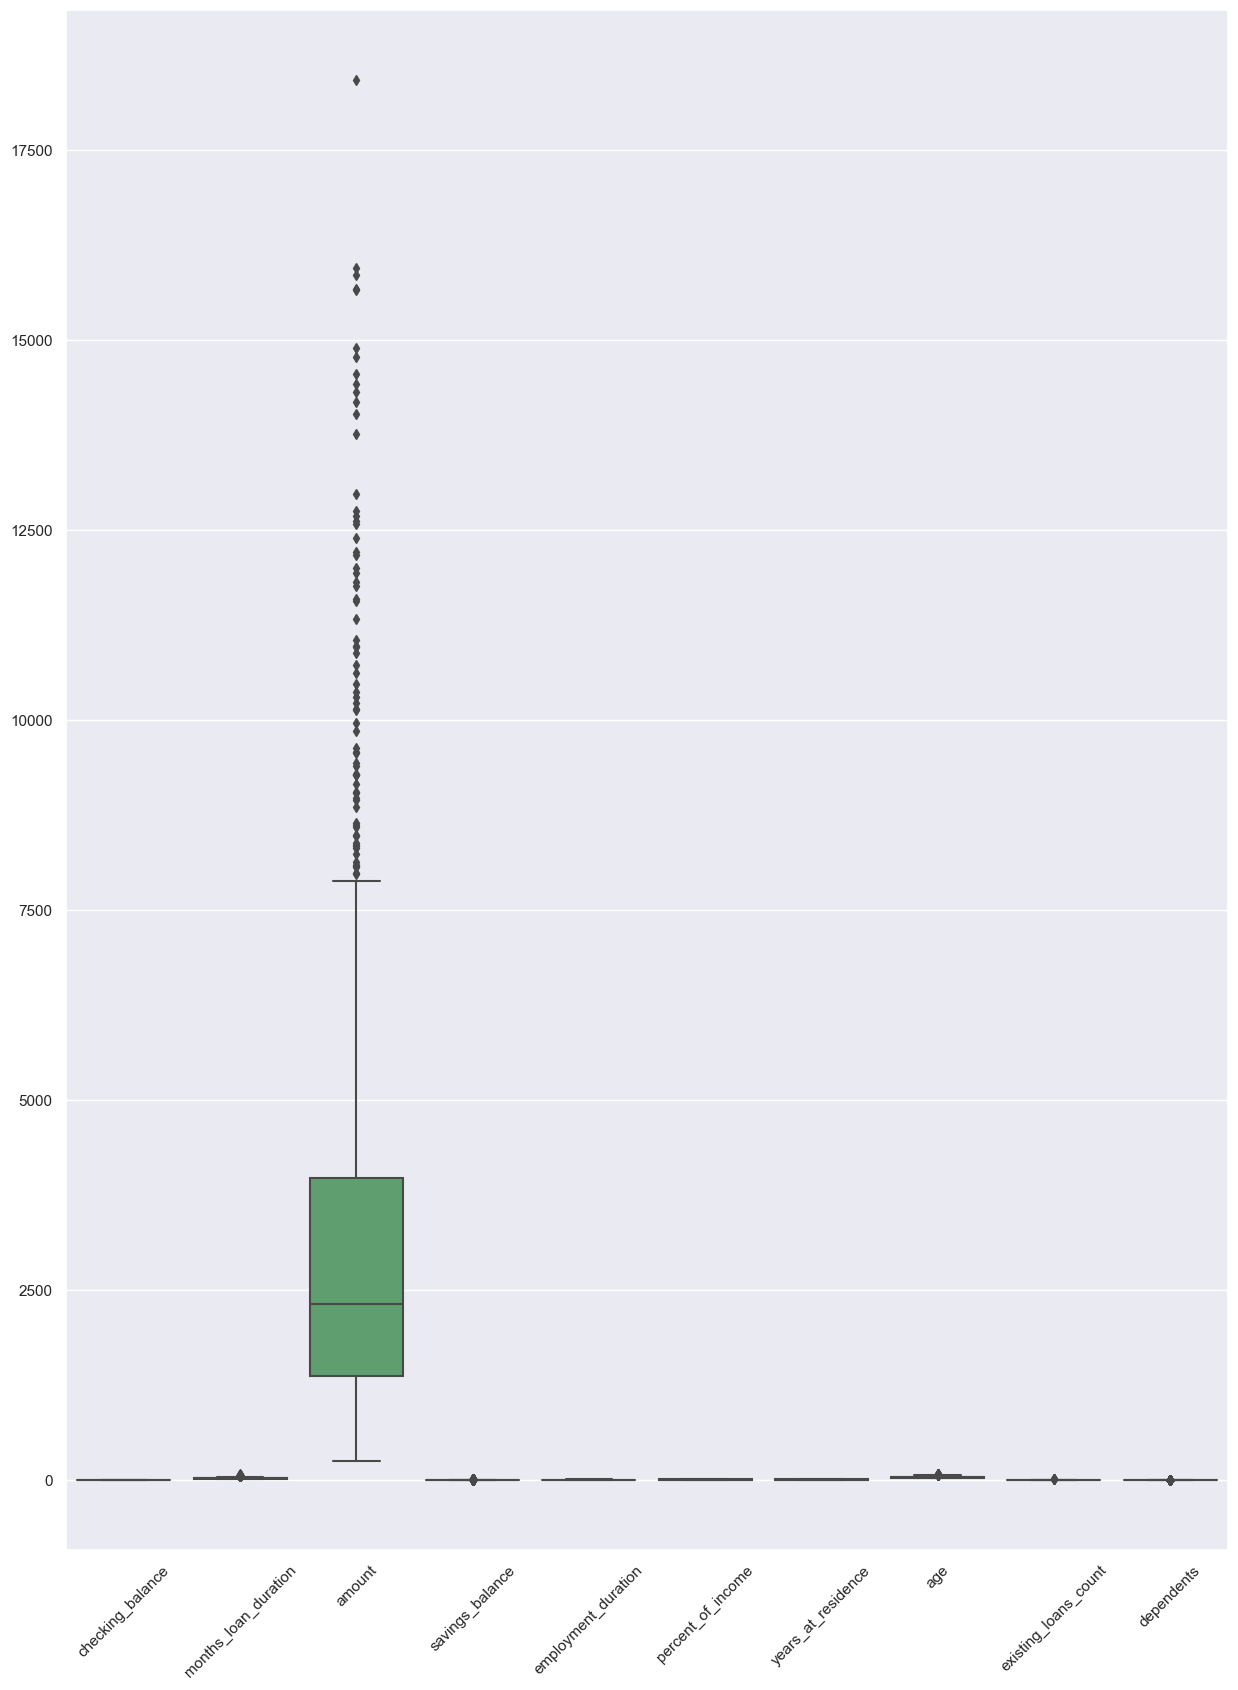

In [76]:
plt.figure(figsize=(15,20),dpi =100)
sns.boxplot(data=credit_df)
plt.xticks(rotation =45)

In [77]:
credit_df.describe()

,checking_balance,months_loan_duration,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.001000,20.903000,3271.258000,0.770000,1.365000,2.973000,2.845000,35.546000,1.407000,1.155000
std,0.957034,12.058814,2822.736876,1.156909,1.275697,1.118715,1.103718,11.375469,0.577654,0.362086
min,0.000000,4.000000,250.000000,0.000000,0.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,0.000000,12.000000,1365.500000,0.000000,0.000000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,1.000000,18.000000,2319.500000,0.000000,1.000000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,2.000000,24.000000,3972.250000,1.000000,2.000000,4.000000,4.000000,42.000000,2.000000,1.000000
max,3.000000,72.000000,18424.000000,4.000000,4.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [71]:
credit_df.value_counts()

checking_balance  months_loan_duration  credit_history  purpose     amount  savings_balance  employment_duration  percent_of_income  years_at_residence  age  other_credit  housing  existing_loans_count  job         dependents  phone  default
0                 4                     critical        appliances  1503    0                2                    2                  1                   42   none          own      2                     unskilled   2           no     no         1
2                 6                     good            appliances  590     0                3                    3                  3                   26   none          own      1                     unskilled   1           no     no         1
1                 48                    good            car         3931    0                2                    4                  4                   46   none          other    1                     skilled     2           no     yes        1
                 